## 图像基本操作

#### 环境配置地址：

- Anaconda:https://www.anaconda.com/download/

- Python_whl:https://www.lfd.uci.edu/~gohlke/pythonlibs/#opencv

- eclipse:按照自己的喜好，选择一个能debug就好

![title](E:\Python_Code\PythonGuide\Module\Extern\OpenCV\StepIn\Ch02_CH07\lena_img.png)

### 数据读取-图像

- cv2.IMREAD_COLOR：彩色图像
- cv2.IMREAD_GRAYSCALE：灰度图像

In [1]:
import cv2 #opencv读取的格式是BGR
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline 

img = cv2.imread(r'E:\Python_Code\PythonGuide\Module\Extern\OpenCV\StepIn\Ch02_CH07\cat.jpg')

In [2]:
img

array([[[142, 151, 160],
        [146, 155, 164],
        [151, 160, 170],
        ...,
        [156, 172, 185],
        [155, 171, 184],
        [154, 170, 183]],

       [[108, 117, 126],
        [112, 123, 131],
        [118, 127, 137],
        ...,
        [155, 171, 184],
        [154, 170, 183],
        [153, 169, 182]],

       [[108, 119, 127],
        [110, 123, 131],
        [118, 128, 138],
        ...,
        [156, 169, 183],
        [155, 168, 182],
        [154, 167, 181]],

       ...,

       [[162, 186, 198],
        [157, 181, 193],
        [142, 166, 178],
        ...,
        [181, 204, 206],
        [170, 193, 195],
        [149, 172, 174]],

       [[140, 164, 176],
        [147, 171, 183],
        [139, 163, 175],
        ...,
        [169, 187, 188],
        [125, 143, 144],
        [106, 124, 125]],

       [[154, 178, 190],
        [154, 178, 190],
        [121, 145, 157],
        ...,
        [183, 198, 200],
        [128, 143, 145],
        [127, 142, 144]]

In [3]:
#图像的显示,也可以创建多个窗口
cv2.imshow('image',img) 
# 等待时间，毫秒级，0表示任意键终止
cv2.waitKey(0) 
cv2.destroyAllWindows()

In [4]:
def cv_show(name,img):
    cv2.imshow(name,img) 
    cv2.waitKey(0) 
    cv2.destroyAllWindows()

In [5]:
img.shape

(414, 500, 3)

In [7]:
img=cv2.imread(r'E:\Python_Code\PythonGuide\Module\Extern\OpenCV\StepIn\Ch02_CH07\cat.jpg',cv2.IMREAD_GRAYSCALE)
img

array([[153, 157, 162, ..., 174, 173, 172],
       [119, 124, 129, ..., 173, 172, 171],
       [120, 124, 130, ..., 172, 171, 170],
       ...,
       [187, 182, 167, ..., 202, 191, 170],
       [165, 172, 164, ..., 185, 141, 122],
       [179, 179, 146, ..., 197, 142, 141]], dtype=uint8)

In [8]:
img.shape

(414, 500)

In [9]:
#图像的显示,也可以创建多个窗口
cv2.imshow('image',img) 
# 等待时间，毫秒级，0表示任意键终止
cv2.waitKey(3000)
cv2.destroyAllWindows()

In [10]:
#保存
cv2.imwrite(r'E:\Python_Code\PythonGuide\Module\Extern\OpenCV\StepIn\Ch02_CH07\mycat.png',img)

True

In [11]:
type(img)

numpy.ndarray

In [ ]:
img.size

In [ ]:
img.dtype

### 数据读取-视频

- cv2.VideoCapture可以捕获摄像头，用数字来控制不同的设备，例如0,1。
- 如果是视频文件，直接指定好路径即可。

In [12]:
vc = cv2.VideoCapture(r'E:\Python_Code\PythonGuide\Module\Extern\OpenCV\StepIn\Ch02_CH07\test.mp4')

In [13]:
# 检查是否打开正确
if vc.isOpened(): 
    oepn, frame = vc.read()
else:
    open = False

In [14]:
while open:
    ret, frame = vc.read()
    if frame is None:
        break
    if ret == True:
        gray = cv2.cvtColor(frame,  cv2.COLOR_BGR2GRAY)
        cv2.imshow('result', gray)
        if cv2.waitKey(100) & 0xFF == 27:
            break
vc.release()
cv2.destroyAllWindows()

### 截取部分图像数据

In [16]:
img=cv2.imread(r'E:\Python_Code\PythonGuide\Module\Extern\OpenCV\StepIn\Ch02_CH07\cat.jpg')
# H = 0-50   W = 0-200
cat=img[0:50,0:200]
cv_show('cat',cat)

### 颜色通道提取

In [17]:
# 提取BGR 通道灰度图
b,g,r=cv2.split(img)

In [ ]:
r

In [ ]:
r.shape

In [18]:
# 按BGR顺序将通道组合起来
img=cv2.merge((b,g,r))
img.shape

(414, 500, 3)

In [19]:
# 只保留R通道
cur_img = img.copy()
cur_img[:,:,0] = 0
cur_img[:,:,1] = 0
cv_show('R',cur_img)



In [20]:
# 只保留G通道
cur_img = img.copy()
cur_img[:,:,0] = 0
cur_img[:,:,2] = 0
cv_show('G',cur_img)

In [21]:
# 只保留B通道
cur_img = img.copy()
cur_img[:,:,1] = 0
cur_img[:,:,2] = 0
cv_show('B',cur_img)

### 边界填充

In [22]:
# 上下左右分别填充的大小
top_size,bottom_size,left_size,right_size = (50,50,50,50)

replicate = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, borderType=cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size,cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, cv2.BORDER_WRAP)
constant = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size,cv2.BORDER_CONSTANT, value=0)

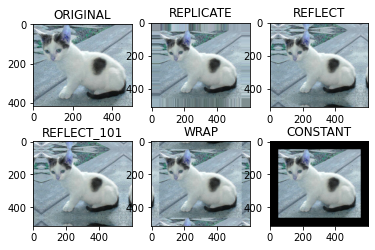

In [23]:
import matplotlib.pyplot as plt
plt.subplot(231), plt.imshow(img, 'gray'), plt.title('ORIGINAL')
plt.subplot(232), plt.imshow(replicate, 'gray'), plt.title('REPLICATE')
plt.subplot(233), plt.imshow(reflect, 'gray'), plt.title('REFLECT')
plt.subplot(234), plt.imshow(reflect101, 'gray'), plt.title('REFLECT_101')
plt.subplot(235), plt.imshow(wrap, 'gray'), plt.title('WRAP')
plt.subplot(236), plt.imshow(constant, 'gray'), plt.title('CONSTANT')

plt.show()

- BORDER_REPLICATE：复制法，也就是复制最边缘像素。
- BORDER_REFLECT：反射法，对感兴趣的图像中的像素在两边进行复制例如：fedcba|abcdefgh|hgfedcb   
- BORDER_REFLECT_101：反射法，也就是以最边缘像素为轴，对称，gfedcb|abcdefgh|gfedcba
- BORDER_WRAP：外包装法cdefgh|abcdefgh|abcdefg  
- BORDER_CONSTANT：常量法，常数值填充。

### 数值计算

In [26]:
img_cat=cv2.imread(r'E:\Python_Code\PythonGuide\Module\Extern\OpenCV\StepIn\Ch02_CH07\cat.jpg')
img_dog=cv2.imread(r'E:\Python_Code\PythonGuide\Module\Extern\OpenCV\StepIn\Ch02_CH07\dog.jpg')

In [27]:
img_cat2= img_cat +10 
img_cat[:5,:,0]

array([[142, 146, 151, ..., 156, 155, 154],
       [108, 112, 118, ..., 155, 154, 153],
       [108, 110, 118, ..., 156, 155, 154],
       [139, 141, 148, ..., 156, 155, 154],
       [153, 156, 163, ..., 160, 159, 158]], dtype=uint8)

In [28]:
img_cat2[:5,:,0]

array([[152, 156, 161, ..., 166, 165, 164],
       [118, 122, 128, ..., 165, 164, 163],
       [118, 120, 128, ..., 166, 165, 164],
       [149, 151, 158, ..., 166, 165, 164],
       [163, 166, 173, ..., 170, 169, 168]], dtype=uint8)

In [29]:
# 相当于% 256
# 当数值越界时，使用此数字除256的余数
(img_cat + img_cat2)[:5,:,0] 

array([[ 38,  46,  56, ...,  66,  64,  62],
       [226, 234, 246, ...,  64,  62,  60],
       [226, 230, 246, ...,  66,  64,  62],
       [ 32,  36,  50, ...,  66,  64,  62],
       [ 60,  66,  80, ...,  74,  72,  70]], dtype=uint8)

In [30]:
# 当数值越界时，使用255
cv2.add(img_cat,img_cat2)[:5,:,0]

array([[255, 255, 255, ..., 255, 255, 255],
       [226, 234, 246, ..., 255, 255, 255],
       [226, 230, 246, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

### 图像融合

In [31]:
# shape值不同，无法进行数值操作
img_cat + img_dog

ValueError: operands could not be broadcast together with shapes (414,500,3) (429,499,3) 

In [33]:
img_cat.shape
img_dog.shape

(429, 499, 3)

In [34]:
# 图像缩放操作  将图像缩放至(500,414)
img_dog = cv2.resize(img_dog, (500, 414))
img_dog.shape

(414, 500, 3)

In [43]:
# 图像融合操作  Y = AX1 + BX2 + Sigma(提高亮度级)
res1 = cv2.addWeighted(img_cat, 0.4, img_dog, 0.6, 0)
res2 = cv2.addWeighted(img_cat, 0.4, img_dog, 0.6, 100)

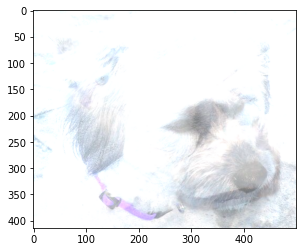

In [44]:
plt.imshow(res1)
plt.imshow(res2)

In [ ]:
# 图像缩放操作  将图像x轴缩放4倍，将图像y轴缩放4倍
res = cv2.resize(img, (0, 0), fx=4, fy=4)
plt.imshow(res)

In [ ]:
res = cv2.resize(img, (0, 0), fx=1, fy=3)
plt.imshow(res)